In [1]:
import BAMT.bamt.Networks as net
import BAMT.bamt.Preprocessors as pp

import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/User/python_virt_env/sangiovese.csv')
data

,Treatment,SproutN,BunchN,GrapeW,WoodW,SPAD06,NDVI06,SPAD08,NDVI08,Acid,Potass,Brix,pH,Anthoc,Polyph
0,T6b,0.202349,0.295120,0.007353,-0.044060,0.123074,-0.011439,0.012205,0.085229,0.203979,-0.104303,-0.127506,-0.051799,-0.275240,-0.193690
1,T7b,0.266060,0.425589,0.119441,0.410288,-0.003285,0.026199,0.140954,0.113828,0.046233,-0.150271,0.075906,0.004393,0.280481,0.379005
2,T8b,0.415644,0.078505,0.439378,0.363778,0.100210,0.090508,0.040111,-0.019662,-0.138107,-0.027917,0.003320,0.041966,-0.016803,-0.259305
3,T4a,-0.120736,0.073215,-0.310475,0.122281,-0.115675,-0.043585,0.042341,0.154439,-0.088854,0.049449,0.095224,0.035857,-0.057244,-0.141223
4,T5b,0.108829,0.355558,-0.483608,-0.525597,-0.173176,-0.139314,-0.216183,-0.121072,0.052817,-0.315021,0.062484,-0.008910,-0.023187,0.172194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T2a,-0.088483,-0.296049,0.364335,0.620447,0.033737,0.085385,0.077058,-0.013535,0.072894,0.066403,-0.010224,-0.011085,0.218075,0.024744
996,T1b,-0.271246,-0.643934,-1.279187,-0.266497,-0.018328,-0.008231,-0.142505,-0.044881,0.211698,-0.176136,0.042513,-0.045726,0.409988,0.237019
997,T8b,0.168427,-0.596038,0.203730,0.359664,0.142399,0.120647,0.295305,0.194176,-0.390239,0.116520,-0.051606,0.046419,0.231731,-0.210982
998,T1a,-0.107611,-0.153681,-0.360631,0.113596,-0.012307,0.035794,-0.044218,-0.045161,0.093396,0.047163,-0.020589,-0.009988,-0.284049,-0.094482


<AxesSubplot:>

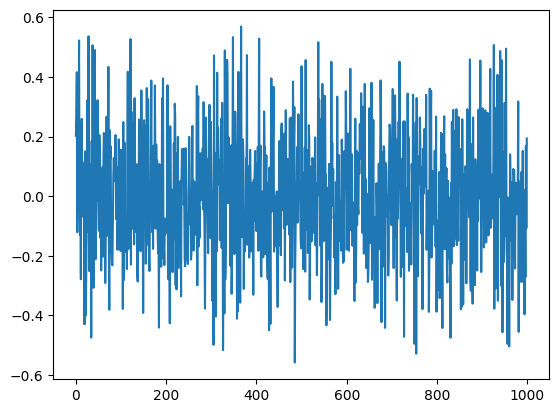

In [3]:
data['SproutN'].plot()

In [4]:
encoder = preprocessing.LabelEncoder()
discretizer = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

p = pp.Preprocessor([('encoder', encoder), ('discretizer', discretizer)])
discretized, est = p.apply(data)
info = p.info
discretized

,Treatment,SproutN,BunchN,GrapeW,WoodW,SPAD06,NDVI06,SPAD08,NDVI08,Acid,Potass,Brix,pH,Anthoc,Polyph
0,11,4,3,2,2,4,2,2,3,4,1,0,0,1,1
1,13,4,4,2,4,2,2,4,3,2,0,4,2,3,4
2,15,4,2,3,3,4,4,3,2,0,2,2,4,2,0
3,6,1,2,1,3,0,1,3,4,1,3,4,4,2,1
4,9,3,4,1,0,0,0,0,0,3,0,3,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,1,3,4,3,3,3,2,3,3,2,2,3,2
996,1,0,0,0,1,2,2,0,1,4,0,3,0,4,4
997,15,4,0,3,3,4,4,4,4,0,3,1,4,3,0
998,0,1,1,1,2,2,3,1,1,3,3,1,2,1,1


In [5]:
true_struct = []
with open('sangiovese_true.txt', 'r') as file:
    for line in file:
        true_struct.append(line.split())

# First BN

In [6]:
bn_1 = net.HybridBN(has_logit=True, use_mixture=True)

In [7]:
bn_1.add_nodes(info)

In [8]:
params = {'init_edges':[('Treatment', 'SproutN'), ('Treatment', 'BunchN')],}
bn_1.add_edges(discretized, scoring_function=('MI',), params=params)

In [9]:
bn_1.get_info()

,name,node_type,data_type,parents,parents_types
0,SPAD08,MixtureGaussian,cont,[],[]
1,Treatment,Logit (LogisticRegression),disc,[SPAD08],[cont]
2,SproutN,ConditionalMixtureGaussian,cont,[Treatment],[disc]
3,BunchN,ConditionalMixtureGaussian,cont,[Treatment],[disc]
4,Potass,MixtureGaussian,cont,[SproutN],[cont]
5,SPAD06,ConditionalMixtureGaussian,cont,"[BunchN, Treatment]","[cont, disc]"
6,Acid,ConditionalMixtureGaussian,cont,"[BunchN, Treatment]","[cont, disc]"
7,pH,ConditionalMixtureGaussian,cont,"[BunchN, Treatment]","[cont, disc]"
8,GrapeW,ConditionalMixtureGaussian,cont,"[Potass, Treatment]","[cont, disc]"
9,WoodW,ConditionalMixtureGaussian,cont,"[Potass, Treatment]","[cont, disc]"


In [10]:
bn_1.shd(true_struct)

67

# Second BN

In [11]:
bn_2 = net.HybridBN(has_logit=True, use_mixture=False)
bn_2.add_nodes(info)
bn_2.add_edges(discretized, scoring_function=('MI',))

In [12]:
bn_2.get_info()

,name,node_type,data_type,parents,parents_types
0,SproutN,Gaussian,cont,[],[]
1,Potass,Gaussian,cont,[SproutN],[cont]
2,NDVI06,Gaussian,cont,[Potass],[cont]
3,NDVI08,Gaussian,cont,[Potass],[cont]
4,Brix,Gaussian,cont,[Potass],[cont]
5,Polyph,Gaussian,cont,[Potass],[cont]
6,BunchN,Gaussian,cont,[NDVI06],[cont]
7,SPAD08,Gaussian,cont,[BunchN],[cont]
8,Treatment,Logit (LogisticRegression),disc,[SPAD08],[cont]
9,GrapeW,ConditionalGaussian,cont,"[Potass, Treatment]","[cont, disc]"


In [13]:
bn_2.shd(true_struct)

70

# Third BN


In [15]:
from pgmpy.estimators import K2Score
bn_3 = net.HybridBN(has_logit=True, use_mixture=True)
bn_3.add_nodes(info)
bn_3.add_edges(discretized, scoring_function=('K2', K2Score))

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [16]:
bn_3.get_info()

,name,node_type,data_type,parents,parents_types
0,Acid,MixtureGaussian,cont,[],[]
1,pH,MixtureGaussian,cont,[Acid],[cont]
2,SPAD06,MixtureGaussian,cont,[pH],[cont]
3,Potass,MixtureGaussian,cont,[pH],[cont]
4,WoodW,MixtureGaussian,cont,[SPAD06],[cont]
5,NDVI08,MixtureGaussian,cont,[WoodW],[cont]
6,SproutN,MixtureGaussian,cont,[WoodW],[cont]
7,SPAD08,MixtureGaussian,cont,"[WoodW, SPAD06]","[cont, cont]"
8,BunchN,MixtureGaussian,cont,[SproutN],[cont]
9,NDVI06,MixtureGaussian,cont,[SPAD08],[cont]


In [17]:
bn_3.shd(true_struct)

50

# Fourth BN

In [18]:
bn_4 = net.HybridBN(has_logit=False, use_mixture=True)
bn_4.add_nodes(info)
bn_4.add_edges(discretized, scoring_function=('K2', K2Score))

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [19]:
bn_4.get_info()

,name,node_type,data_type,parents,parents_types
0,Treatment,Discrete,disc,[],[]
1,Acid,MixtureGaussian,cont,[],[]
2,pH,MixtureGaussian,cont,[Acid],[cont]
3,SPAD06,MixtureGaussian,cont,[pH],[cont]
4,Potass,MixtureGaussian,cont,[pH],[cont]
5,SproutN,ConditionalMixtureGaussian,cont,"[SPAD06, Treatment]","[cont, disc]"
6,WoodW,MixtureGaussian,cont,[SPAD06],[cont]
7,BunchN,ConditionalMixtureGaussian,cont,"[SproutN, Treatment]","[cont, disc]"
8,NDVI08,MixtureGaussian,cont,[WoodW],[cont]
9,SPAD08,MixtureGaussian,cont,"[WoodW, SPAD06]","[cont, cont]"


In [20]:
bn_4.shd(true_struct)

48

# SHD
Функция, которая была добавлена в класс BaseNetwork:

In [21]:
def shd(self, true_structure):
        same = 0
        dif_direction = 0

        for i in true_structure:
            for j in self.edges:
                if i == j:
                    same += 1
                    break
                else:
                    if i[0] == j[1] and i[1] == j[0]:
                        dif_direction += 1
                        break
            M = len(self.edges)
            N = len(true_structure)

        return M + N - 2*same - dif_direction

# Compare two BN

In [22]:
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
bn_1.set_classifiers(classifiers={'Structural setting': DecisionTreeClassifier(),
                                 'Lithology': RandomForestClassifier(),
                                 'Period': KNeighborsClassifier(n_neighbors=2)})

In [24]:
%%time
bn_1.fit_parameters(data)

CPU times: total: 13min 2s
Wall time: 1min 55s


In [25]:
%%time
bn_4.fit_parameters(data)

CPU times: total: 4min 33s
Wall time: 38.6 s


In [26]:
%%time
synth_data_mi = bn_1.sample(1000, as_df=True)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 113.38it/s]

CPU times: total: 8.88 s
Wall time: 8.86 s


In [27]:
%%time
synth_data_k2 = bn_4.sample(1000, as_df=True)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 142.67it/s]

CPU times: total: 7.08 s
Wall time: 7.03 s


In [28]:
synth_data_k2

,Treatment,Acid,pH,SPAD06,Potass,SproutN,WoodW,BunchN,NDVI08,SPAD08,GrapeW,NDVI06,Polyph,Brix,Anthoc
0,T7b,-0.140235,-0.000228,0.033310,-0.121562,0.085161,0.084464,-0.086332,-0.051794,0.024416,-0.227632,-0.022492,0.259439,-0.044017,0.621623
1,T3a,0.095360,-0.060226,-0.124370,0.157972,-0.317276,-1.193019,-0.652141,-0.191579,-0.200746,-1.225214,-0.240602,0.057829,0.155549,0.421501
2,T6b,0.093829,0.011318,-0.045089,0.158348,-0.029375,-0.942908,0.029127,-0.247581,-0.046956,-0.604598,0.053400,0.025175,0.236000,-0.189012
3,T4a,0.226695,-0.078836,-0.124130,-0.033088,-0.221405,-0.454794,-0.361081,0.007415,-0.202335,-0.581037,-0.180775,0.460740,0.132462,0.791419
4,T5b,-0.164270,0.027373,-0.127145,-0.190073,0.095289,-0.153870,0.233368,0.024917,-0.109996,-0.020929,-0.052282,0.369779,0.037072,0.322766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T8a,0.208641,-0.077439,-0.130039,-0.148085,0.059279,-0.872792,-0.140839,-0.201172,-0.233038,-0.290074,-0.009171,0.407801,0.044498,0.287859
996,T3b,0.002850,0.018223,-0.054871,0.025674,-0.409888,-0.155079,-0.118089,-0.277383,-0.054737,-0.112498,0.052253,-0.182245,0.048911,-0.390846
997,T2a,-0.017388,0.004683,-0.023316,0.174642,-0.122560,-0.159238,-0.172574,0.056650,0.039126,-0.067431,-0.073729,-0.205611,-0.037294,-0.340763
998,T1b,-0.500505,0.078500,0.207369,0.059386,0.168195,0.875439,0.233389,0.425635,0.237770,0.222330,0.070933,-0.062200,0.107713,0.230641


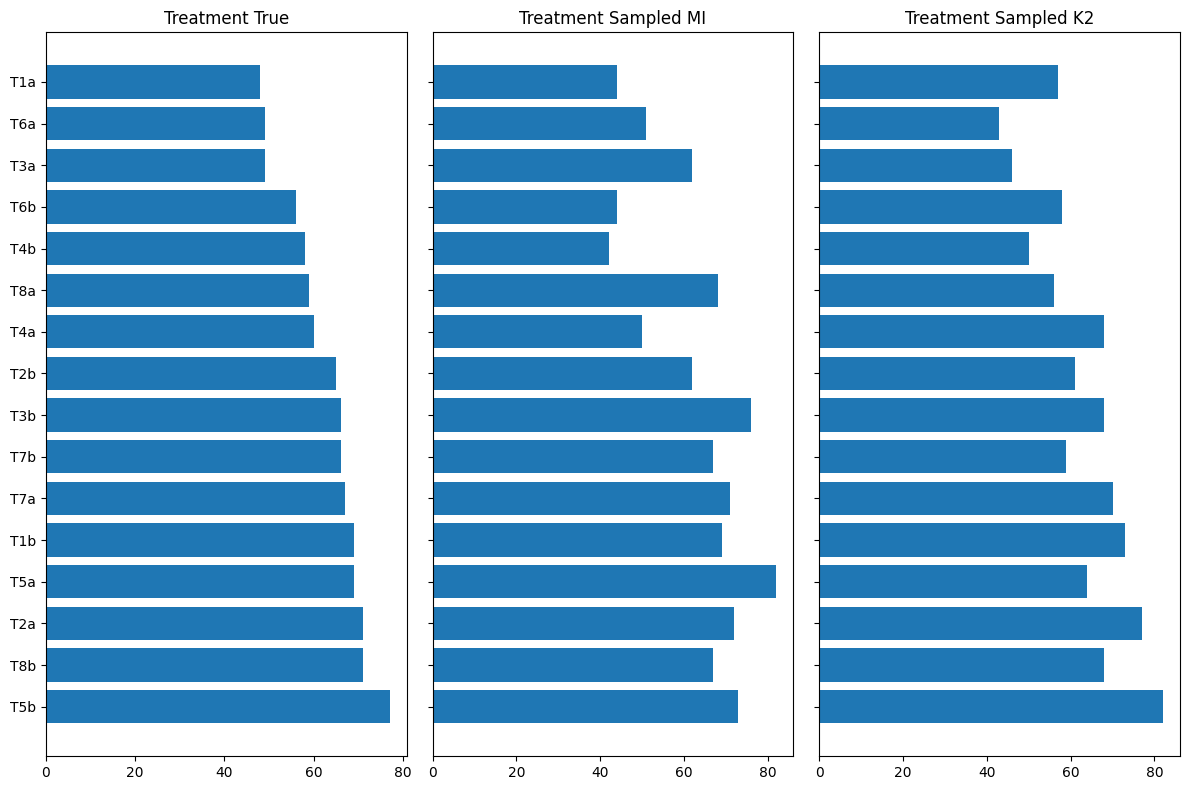

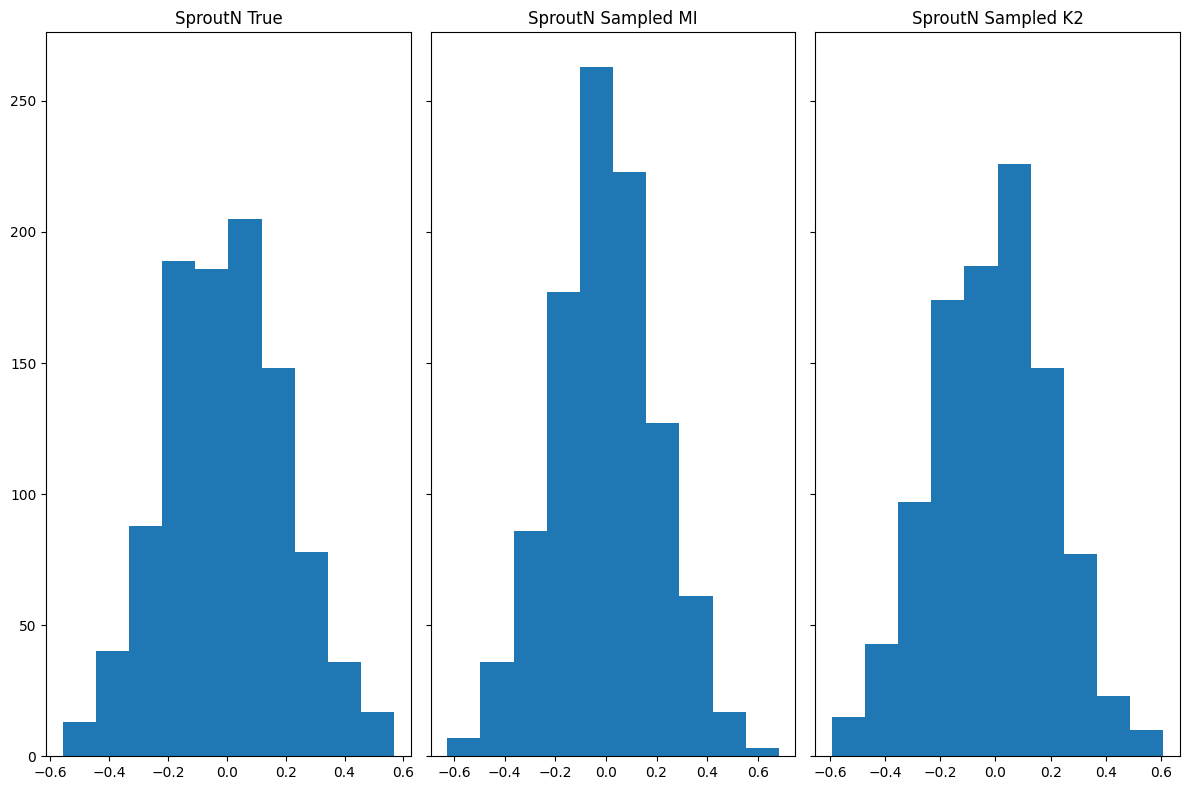

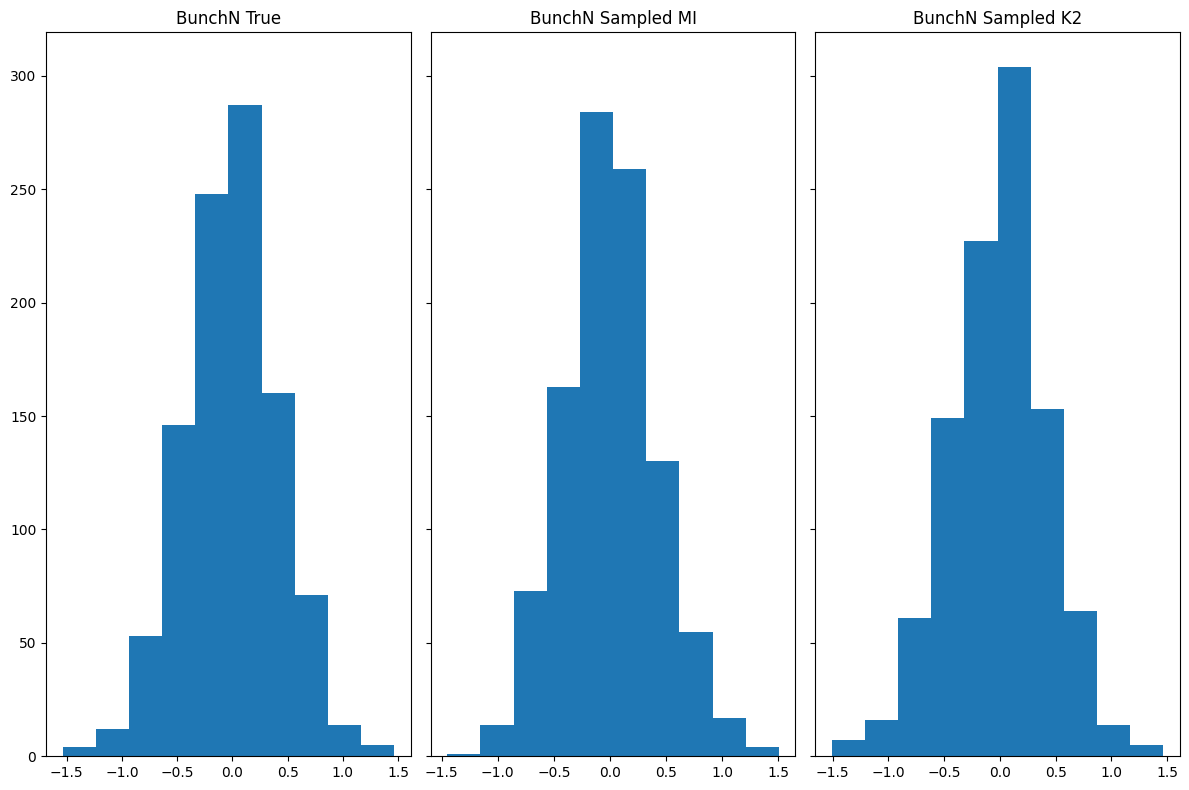

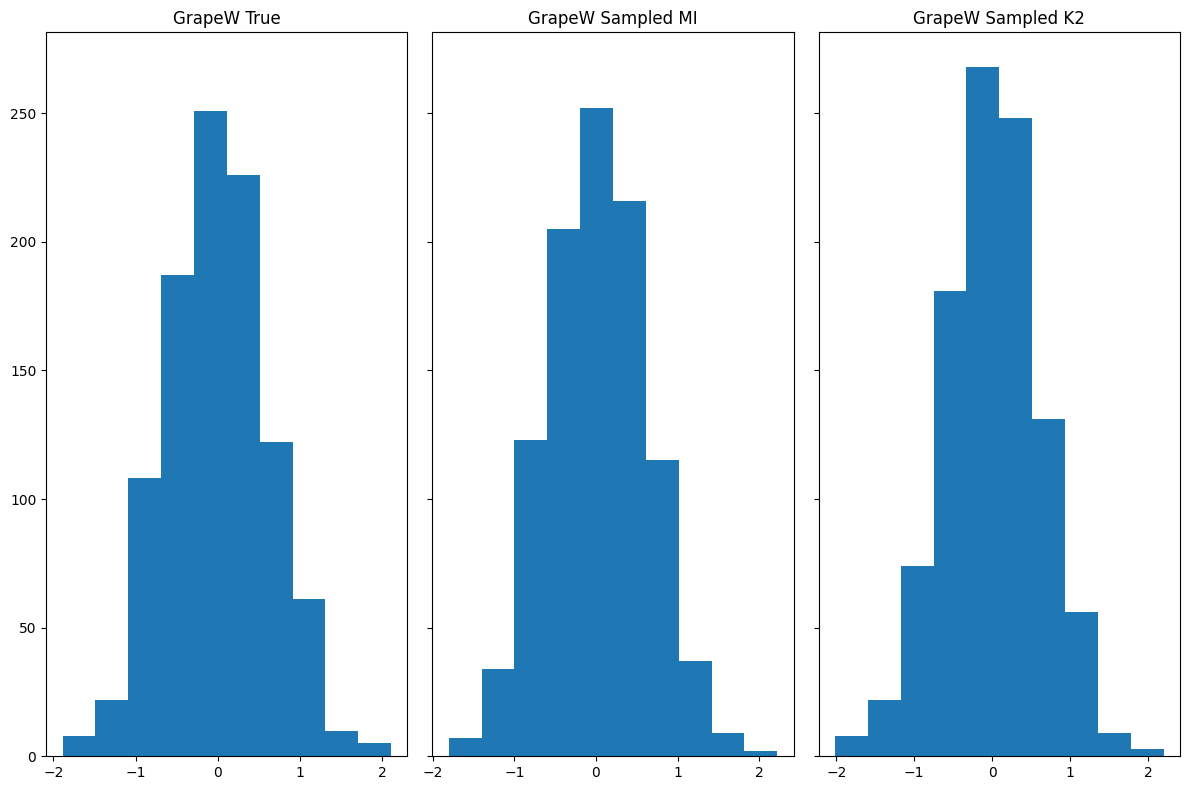

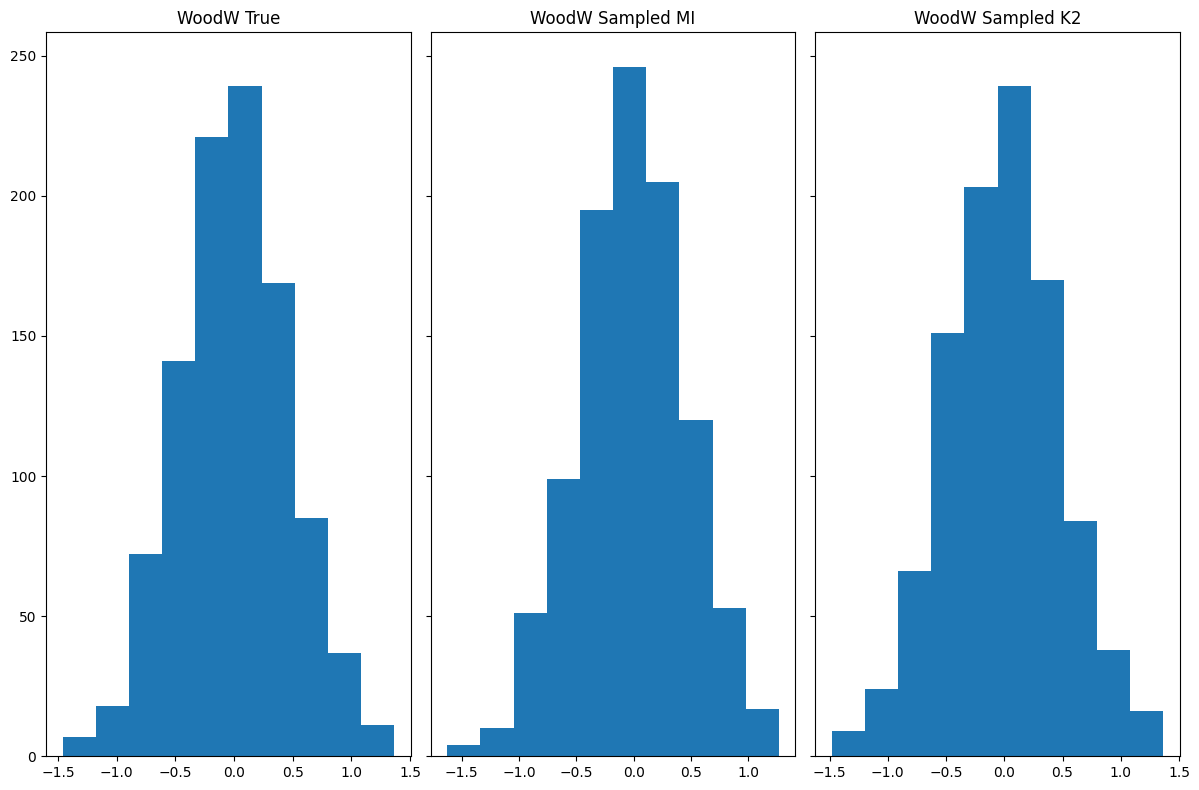

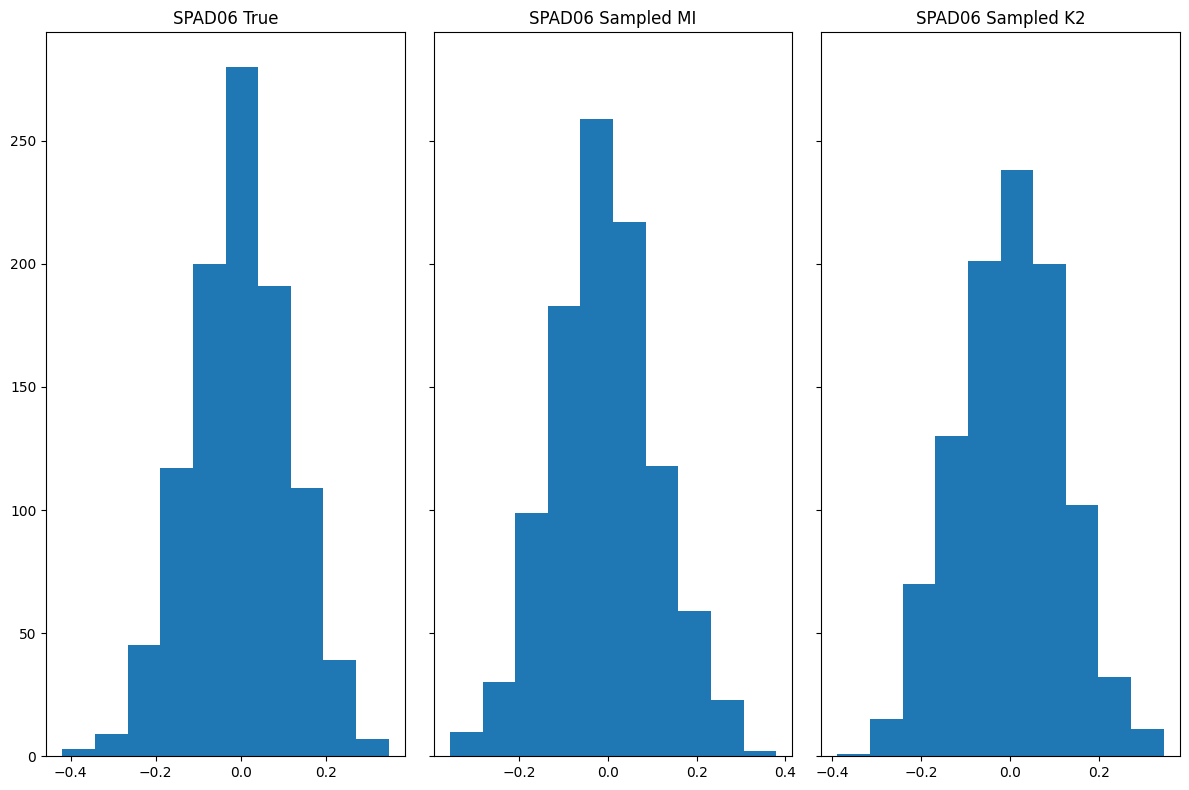

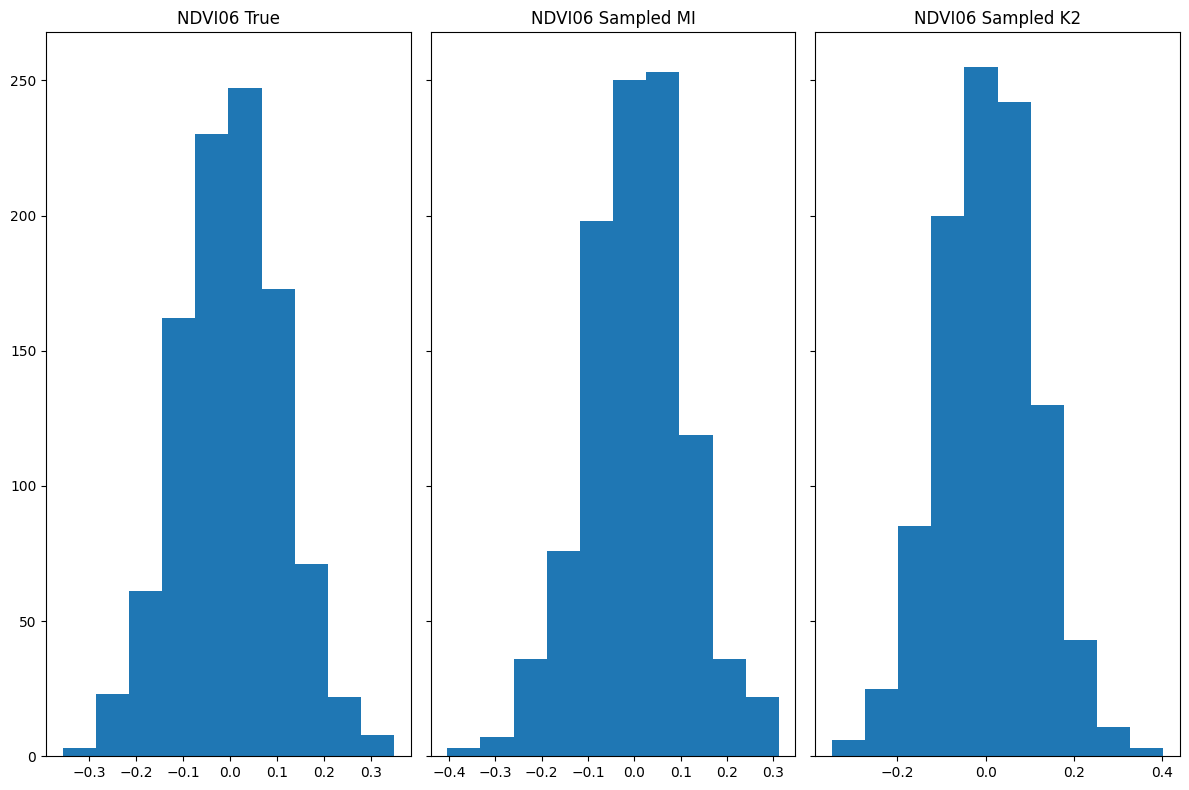

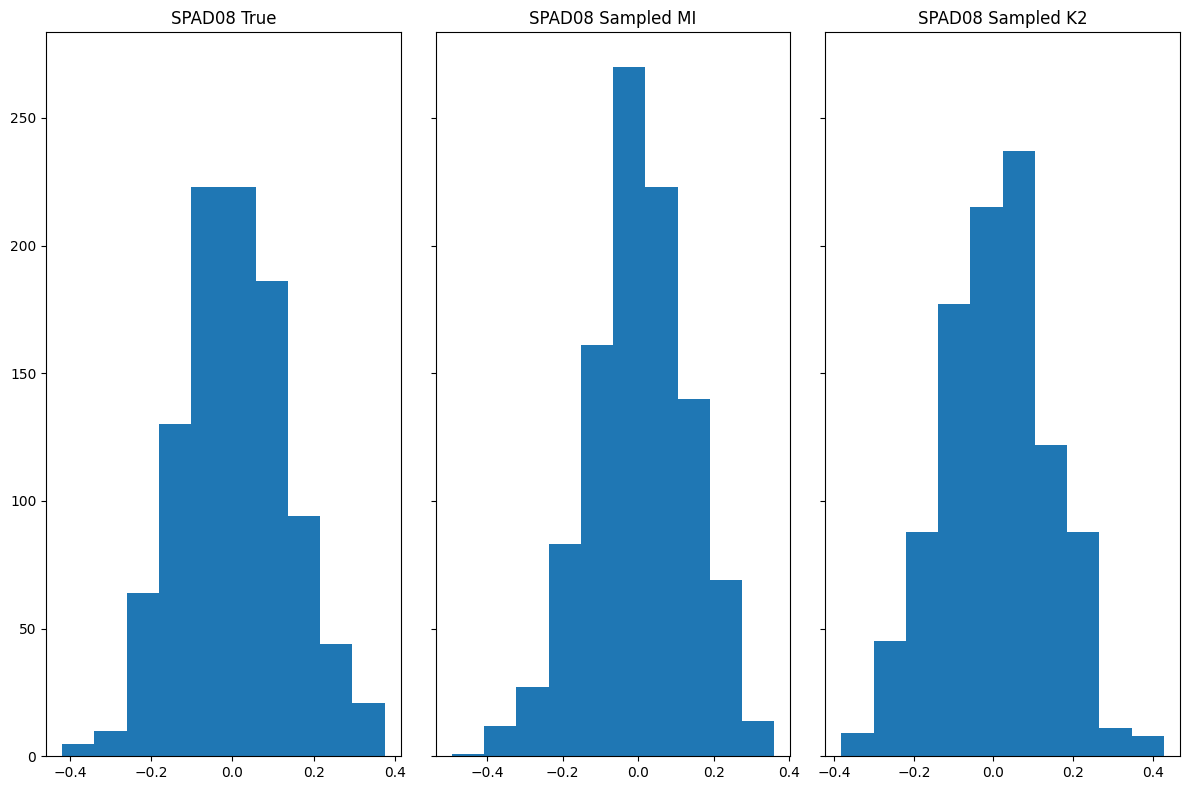

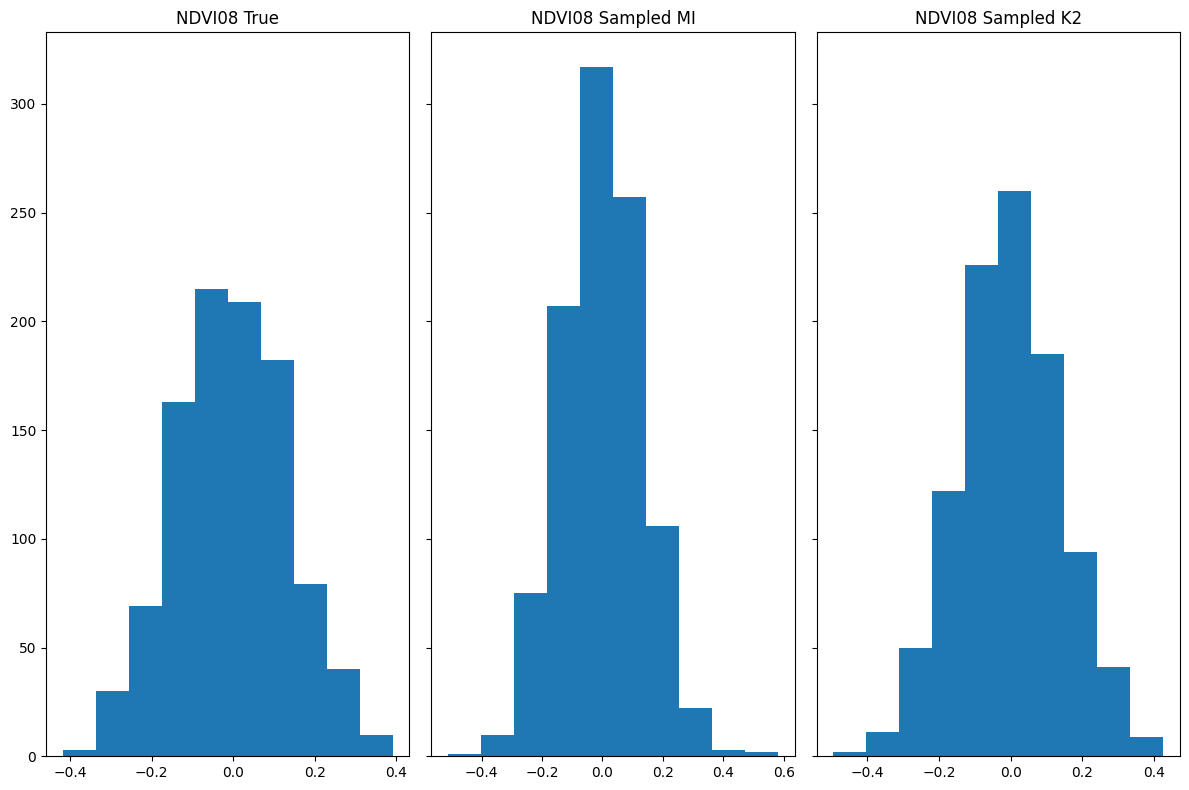

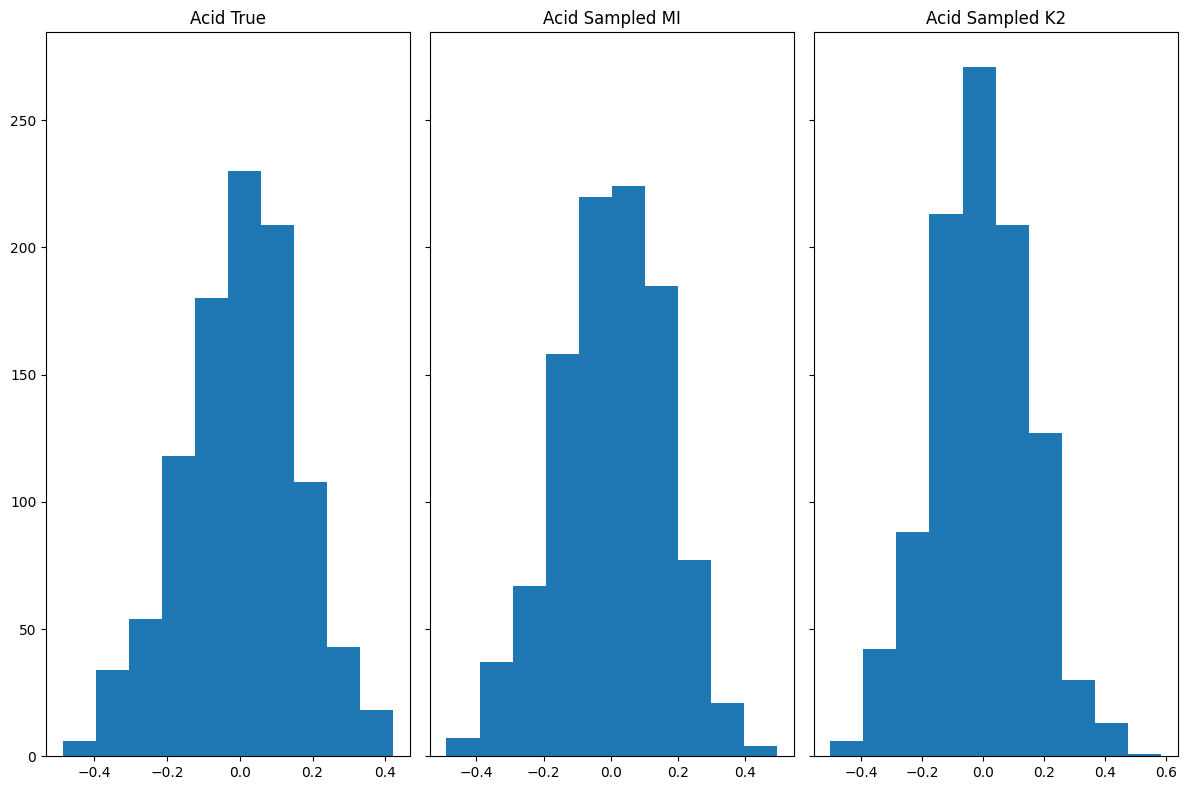

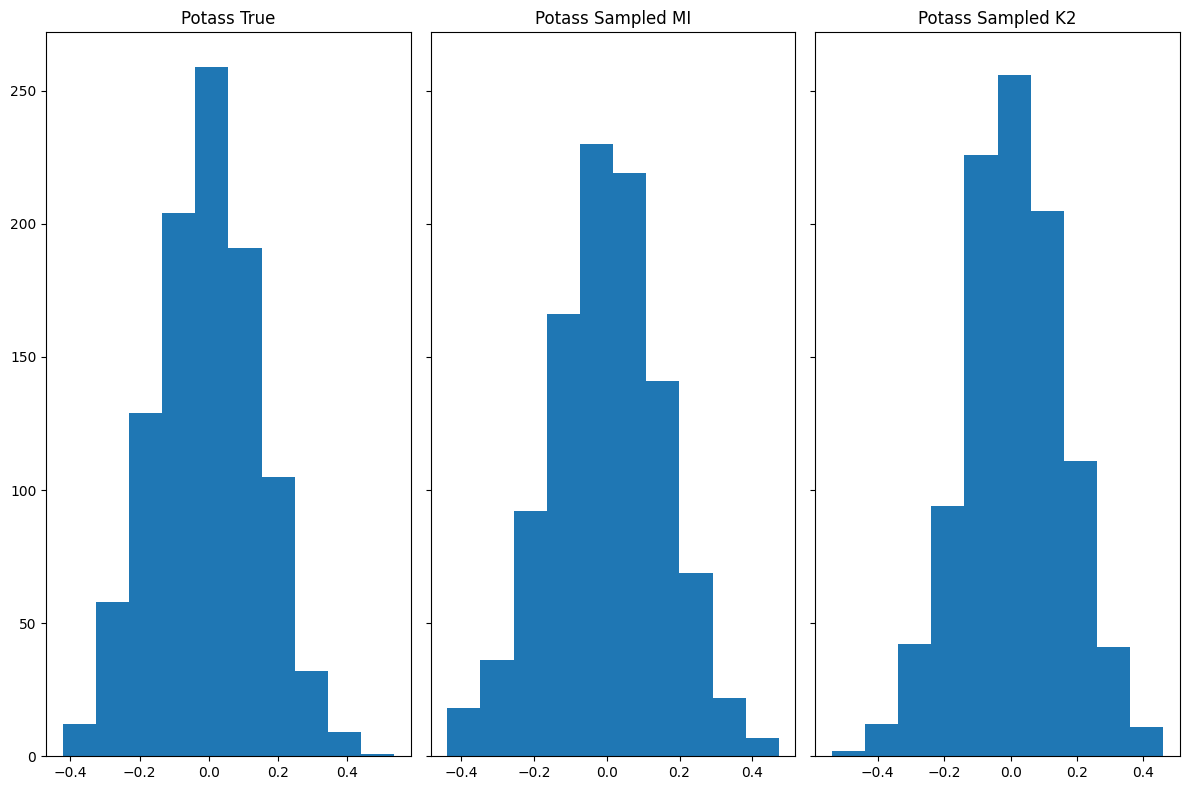

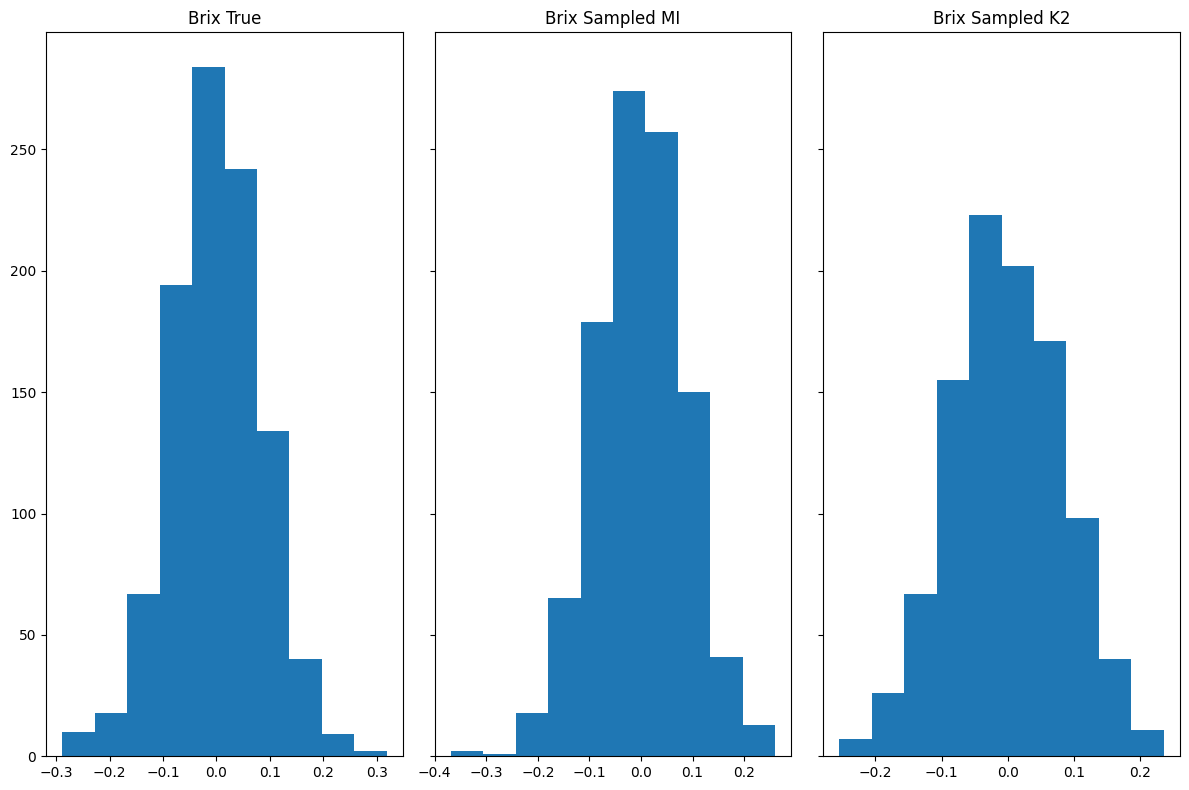

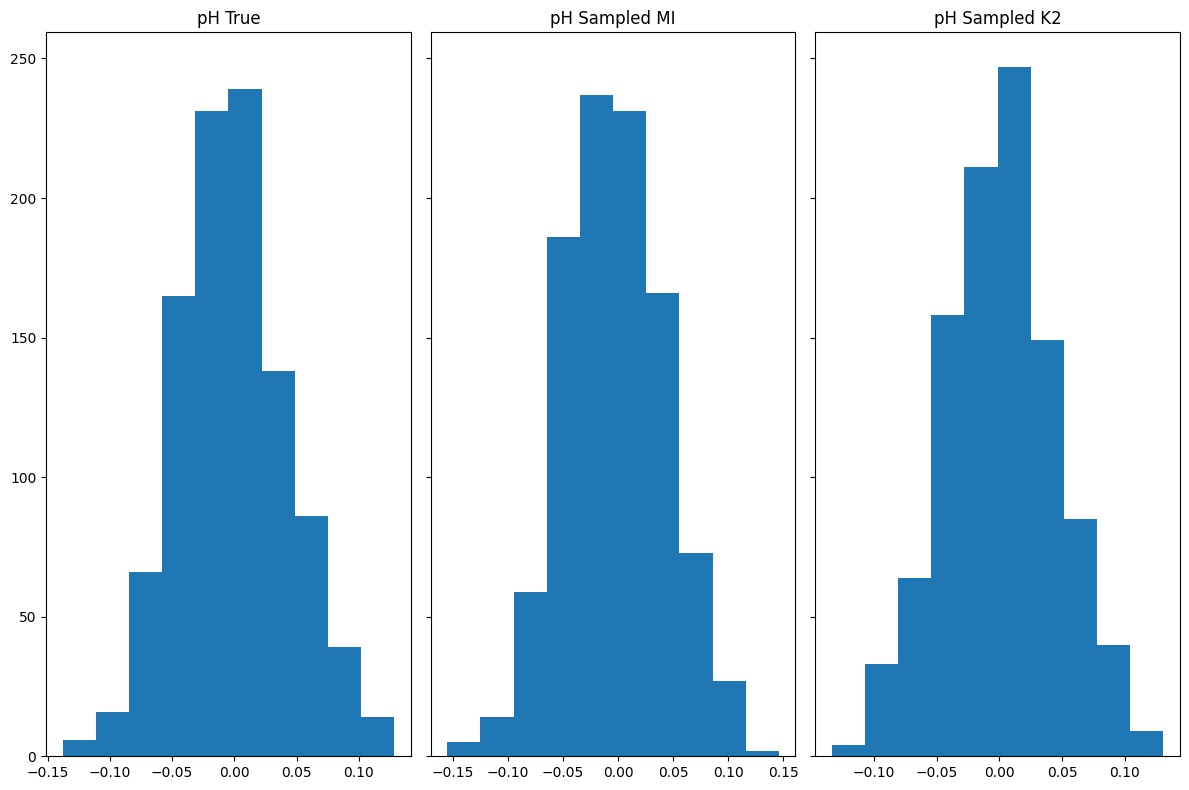

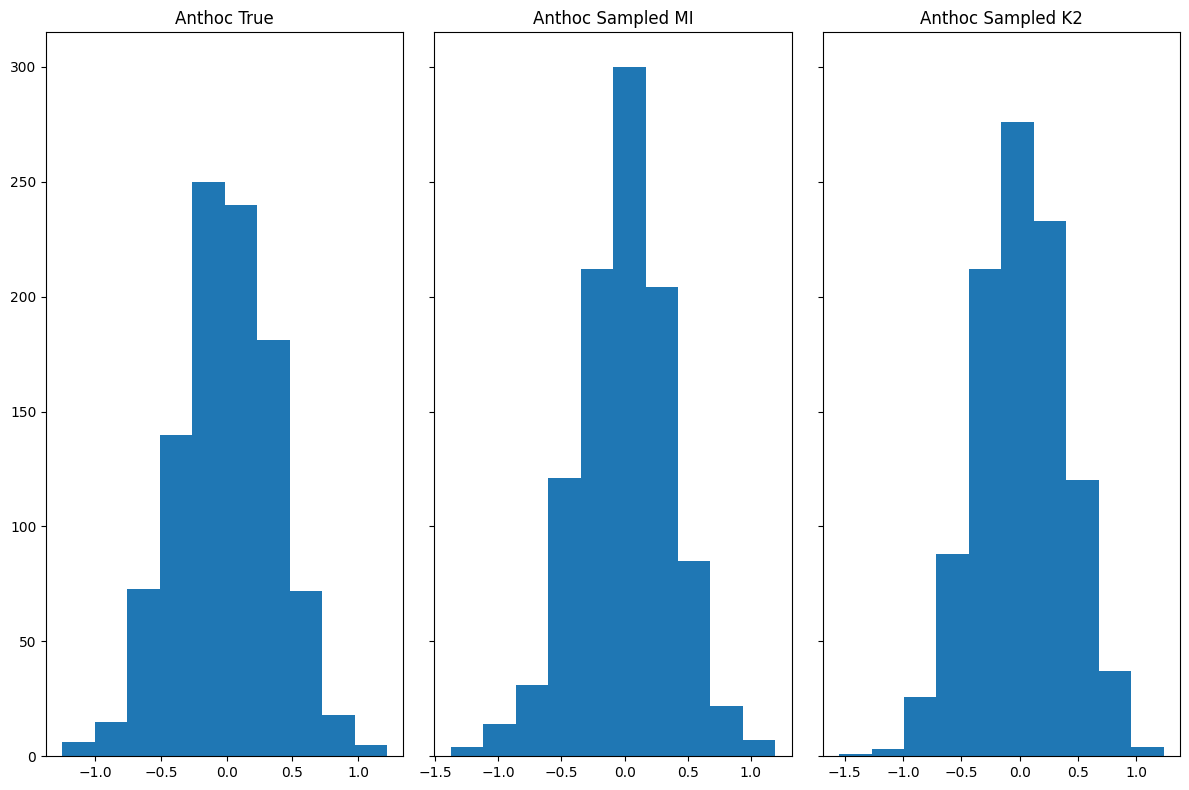

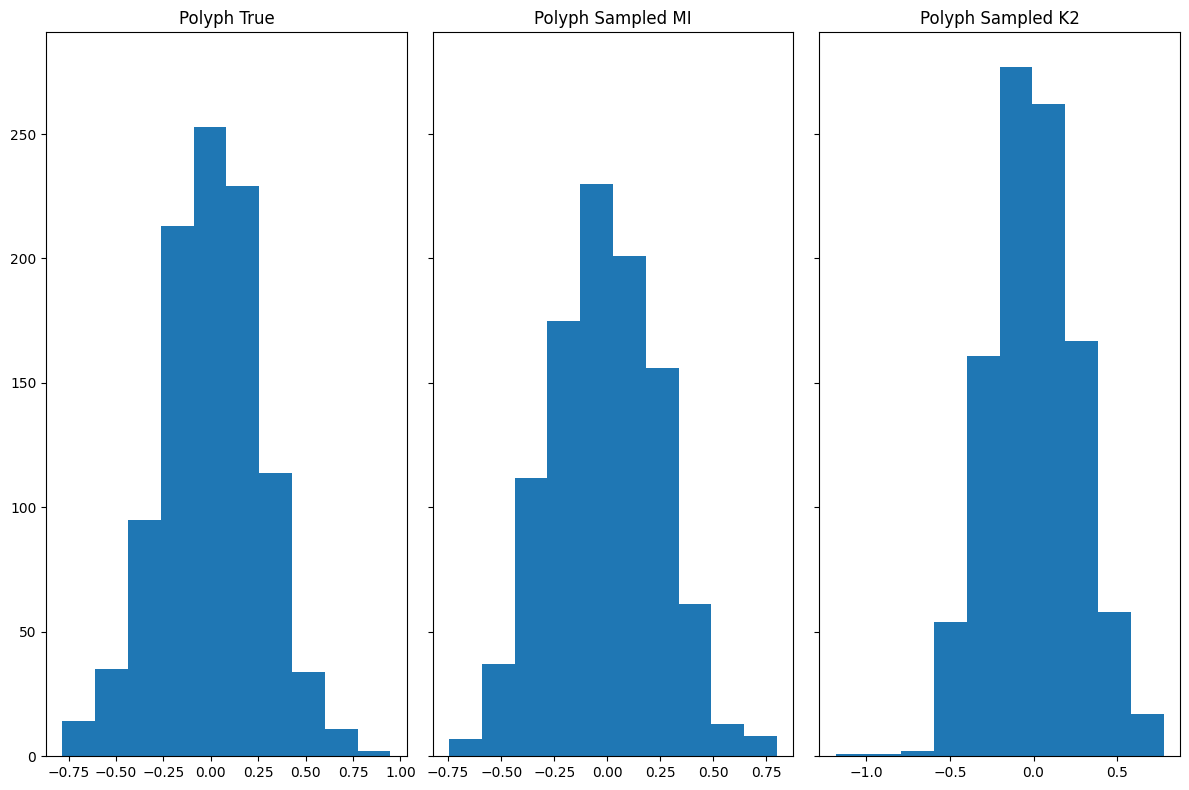

In [29]:
for column in data.columns.to_list():
    fig, ax = plt.subplots(1,3, figsize=(12,8), sharey=True)
    if data[column].dtype.name in ['float64']:
        ax[0].hist(data[column].values)
        ax[1].hist(synth_data_mi[column].values)
        ax[2].hist(synth_data_k2[column].values)
    else:
        ax[0].barh(data[column].value_counts().index, data[column].value_counts().values)
        ax[1].barh(synth_data_mi[column].value_counts().index, synth_data_mi[column].value_counts().values)
        ax[2].barh(synth_data_k2[column].value_counts().index, synth_data_k2[column].value_counts().values)
    ax[0].set_title(f'{column} True')
    ax[1].set_title(f'{column} Sampled MI')
    ax[2].set_title(f"{column} Sampled K2")
    
    plt.tight_layout()

In [30]:
data_filtered = data.dropna()
data_filtered

,Treatment,SproutN,BunchN,GrapeW,WoodW,SPAD06,NDVI06,SPAD08,NDVI08,Acid,Potass,Brix,pH,Anthoc,Polyph
0,T6b,0.202349,0.295120,0.007353,-0.044060,0.123074,-0.011439,0.012205,0.085229,0.203979,-0.104303,-0.127506,-0.051799,-0.275240,-0.193690
1,T7b,0.266060,0.425589,0.119441,0.410288,-0.003285,0.026199,0.140954,0.113828,0.046233,-0.150271,0.075906,0.004393,0.280481,0.379005
2,T8b,0.415644,0.078505,0.439378,0.363778,0.100210,0.090508,0.040111,-0.019662,-0.138107,-0.027917,0.003320,0.041966,-0.016803,-0.259305
3,T4a,-0.120736,0.073215,-0.310475,0.122281,-0.115675,-0.043585,0.042341,0.154439,-0.088854,0.049449,0.095224,0.035857,-0.057244,-0.141223
4,T5b,0.108829,0.355558,-0.483608,-0.525597,-0.173176,-0.139314,-0.216183,-0.121072,0.052817,-0.315021,0.062484,-0.008910,-0.023187,0.172194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T2a,-0.088483,-0.296049,0.364335,0.620447,0.033737,0.085385,0.077058,-0.013535,0.072894,0.066403,-0.010224,-0.011085,0.218075,0.024744
996,T1b,-0.271246,-0.643934,-1.279187,-0.266497,-0.018328,-0.008231,-0.142505,-0.044881,0.211698,-0.176136,0.042513,-0.045726,0.409988,0.237019
997,T8b,0.168427,-0.596038,0.203730,0.359664,0.142399,0.120647,0.295305,0.194176,-0.390239,0.116520,-0.051606,0.046419,0.231731,-0.210982
998,T1a,-0.107611,-0.153681,-0.360631,0.113596,-0.012307,0.035794,-0.044218,-0.045161,0.093396,0.047163,-0.020589,-0.009988,-0.284049,-0.094482


In [31]:
columns = ['SproutN', 'BunchN', 'WoodW', 'Acid']
Y = data_filtered[columns]
X = data_filtered.drop(columns, axis=1)

In [32]:
X

,Treatment,GrapeW,SPAD06,NDVI06,SPAD08,NDVI08,Potass,Brix,pH,Anthoc,Polyph
0,T6b,0.007353,0.123074,-0.011439,0.012205,0.085229,-0.104303,-0.127506,-0.051799,-0.275240,-0.193690
1,T7b,0.119441,-0.003285,0.026199,0.140954,0.113828,-0.150271,0.075906,0.004393,0.280481,0.379005
2,T8b,0.439378,0.100210,0.090508,0.040111,-0.019662,-0.027917,0.003320,0.041966,-0.016803,-0.259305
3,T4a,-0.310475,-0.115675,-0.043585,0.042341,0.154439,0.049449,0.095224,0.035857,-0.057244,-0.141223
4,T5b,-0.483608,-0.173176,-0.139314,-0.216183,-0.121072,-0.315021,0.062484,-0.008910,-0.023187,0.172194
...,...,...,...,...,...,...,...,...,...,...,...
995,T2a,0.364335,0.033737,0.085385,0.077058,-0.013535,0.066403,-0.010224,-0.011085,0.218075,0.024744
996,T1b,-1.279187,-0.018328,-0.008231,-0.142505,-0.044881,-0.176136,0.042513,-0.045726,0.409988,0.237019
997,T8b,0.203730,0.142399,0.120647,0.295305,0.194176,0.116520,-0.051606,0.046419,0.231731,-0.210982
998,T1a,-0.360631,-0.012307,0.035794,-0.044218,-0.045161,0.047163,-0.020589,-0.009988,-0.284049,-0.094482


In [33]:
predictions_mi = bn_1.predict(test=X, parall_count=3)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.75it/s]


In [34]:
predictions_k2 = bn_4.predict(test=X, parall_count=3)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 119.56it/s]


In [35]:
for column in columns:
    if bn_1.descriptor['types'][column] == 'cont':
        print(f"{column: < 25} MSE: {round(mean_squared_error(Y[column], predictions_mi[column], squared=False), 10): >13}")
    else:
        print(f"{column: < 25} Accuracy:  {round(accuracy_score(Y[column], predictions_mi[column]), 10)}")

SproutN                   MSE:  0.1659448759
BunchN                    MSE:  0.3734683666
WoodW                     MSE:  0.4404321286
Acid                      MSE:  0.1541584104


In [36]:
for column in columns:
    if bn_4.descriptor['types'][column] == 'cont':
        print(f"{column: <25} MSE: {round(mean_squared_error(Y[column], predictions_k2[column], squared=False), 10): >13}")
    else:
        print(f"{column: <25} Accuracy:  {round(accuracy_score(Y[column], predictions_k2[column]), 10)}")

SproutN                   MSE:  0.1260919086
BunchN                    MSE:  0.3653602872
WoodW                     MSE:  0.3180716609
Acid                      MSE:  0.1595913296


# Выводы 
В целом все результаты не очень точные. Но четвертая сеть bn_4 показала лучший результат по метрике SHD. В ней используется смесь гауссовских распределений, в качестве функции скоринга - K2Score, и не используется logit. Также ее fit_parametres сработал быстрее, чем у bn_1. При этом данные, сгенерированные bn_4, визуально выглядят довольно похожими на оригинальные.